In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import cv2


In [ ]:
# Reading the text dataset
df_text = pd.read_csv('/content/prd_classification_text.csv')
df_text.head(10)

,id,nomProduit,marque,category,famille_drive,rayon_drive
0,9632,Pressade nectar de thé à la pêche bio 6x20cl,PRESSADE,Boissons à base de thé,Epicerie sucrée,Bio & Ecolo
1,11316,Andros Pur jus d'oranges pressées avec pulpe 1L,ANDROS,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes
2,11322,Tropicana pure premium jus de pommes pressées 1l,TROPICANA,Jus de pomme,Jus d'orange,Fruits & légumes
3,11324,Tropicana pur jus ananas citron vert 1l,TROPICANA,Mélanges de fruits,Jus d'orange,Fruits & légumes
4,188,Innocent Pur jus d'oranges sanguines 90cl,INNOCENT,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes
5,192,Innocent Pur jus d'oranges avec pulpe 90cl,INNOCENT,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes
6,178,Innocent Pur jus d'oranges sans pulpe 90cl,INNOCENT,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes
7,139524,Andros Pur jus d'oranges sans pulpe 1L,ANDROS,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes
8,223606,ANDROS Pur jus d'oranges pressées sans sucres ...,ANDROS,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes
9,202,Tropicana Pur jus d'oranges pressées avec pulp...,TROPICANA,Jus et nectars à l'orange,Jus d'orange,Fruits & légumes


In [ ]:
#Dealing with missing values
df_text.isnull().sum()

id                 0
nomProduit         0
marque           287
category           0
famille_drive      0
rayon_drive        0
dtype: int64

In [ ]:
# Locating product without a mark 
df_text.loc[df_text['marque']=='SANS MARQUE']

,id,nomProduit,marque,category,famille_drive,rayon_drive
37,5582,"Contrex Eau minérale naturelle plate 6x1,5l",SANS MARQUE,Eaux plates,Eaux plates,Boissons
86,10594,Pure Thé thé infusé glacé grenade 1l,SANS MARQUE,Eaux aromatisée plates,Colas,Boissons
121,10913,St Simon rhum ambré 35° -70cl,SANS MARQUE,Rhums,Bières,Boissons
136,7984,"Hommelbier Bière blonde belge 7,5% 75cl",SANS MARQUE,Bières spéciales,Bières,Boissons
158,11124,AOP Saint-Emilion Léo de la Gaffelière rouge 75cl,SANS MARQUE,Bordeaux,Vins rouges,Boissons
159,196012,AOP Blaye-Côtes-de-Bordeaux Closeraie de Tutia...,SANS MARQUE,Bordeaux,Vins rouges,Boissons
160,51737,Bordeaux rouge Roc St Vincent -75cl,SANS MARQUE,Bordeaux,Vins rouges,Boissons
163,11068,Bordeaux supérieur Château Grava rouge 13° -75cl,SANS MARQUE,Bordeaux,Vins rouges,Boissons
164,11088,"Listrac Médoc cru bourgeois moulin Laborde 12,...",SANS MARQUE,Bordeaux,Vins rouges,Boissons
165,11127,AOP Médoc Château Leboscq rouge 75cl,SANS MARQUE,Bordeaux,Vins rouges,Boissons


In [ ]:
# Shifting the category to the right and filling missing values with SANS MARQUE
df_text = df_text[[c for c in df_text if c not in ['category']] + ['category']]
df_text = df_text.fillna('SANS MARQUE')
df_text.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,Pressade nectar de thé à la pêche bio 6x20cl,PRESSADE,Epicerie sucrée,Bio & Ecolo,Boissons à base de thé
1,11316,Andros Pur jus d'oranges pressées avec pulpe 1L,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
2,11322,Tropicana pure premium jus de pommes pressées 1l,TROPICANA,Jus d'orange,Fruits & légumes,Jus de pomme
3,11324,Tropicana pur jus ananas citron vert 1l,TROPICANA,Jus d'orange,Fruits & légumes,Mélanges de fruits
4,188,Innocent Pur jus d'oranges sanguines 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
5,192,Innocent Pur jus d'oranges avec pulpe 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
6,178,Innocent Pur jus d'oranges sans pulpe 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
7,139524,Andros Pur jus d'oranges sans pulpe 1L,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
8,223606,ANDROS Pur jus d'oranges pressées sans sucres ...,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
9,202,Tropicana Pur jus d'oranges pressées avec pulp...,TROPICANA,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange


In [ ]:
#Dealing with missing data
df_text.isnull().sum()

id               0
nomProduit       0
marque           0
famille_drive    0
rayon_drive      0
category         0
dtype: int64

In [ ]:
# Creating a copy of the orignal dataset to work on
new_dftext = df_text[['id','nomProduit', 'marque', 'famille_drive','rayon_drive','category']].copy()
new_dftext.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,Pressade nectar de thé à la pêche bio 6x20cl,PRESSADE,Epicerie sucrée,Bio & Ecolo,Boissons à base de thé
1,11316,Andros Pur jus d'oranges pressées avec pulpe 1L,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
2,11322,Tropicana pure premium jus de pommes pressées 1l,TROPICANA,Jus d'orange,Fruits & légumes,Jus de pomme
3,11324,Tropicana pur jus ananas citron vert 1l,TROPICANA,Jus d'orange,Fruits & légumes,Mélanges de fruits
4,188,Innocent Pur jus d'oranges sanguines 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
5,192,Innocent Pur jus d'oranges avec pulpe 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
6,178,Innocent Pur jus d'oranges sans pulpe 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
7,139524,Andros Pur jus d'oranges sans pulpe 1L,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
8,223606,ANDROS Pur jus d'oranges pressées sans sucres ...,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
9,202,Tropicana Pur jus d'oranges pressées avec pulp...,TROPICANA,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange


In [ ]:
# Dealing with ponctuation mark
new_dftext[new_dftext.nomProduit.str.contains(';')]

,id,nomProduit,marque,famille_drive,rayon_drive,category
272,184630,Chocolats œuf chocolat au lait &amp; éclats d...,CHEVALIERS ARGOUGES,Epicerie sucrée,Bio et Ecologie,autres chocolats
373,185687,Œuf chocolat moi moche &amp; méchant KINDER SU...,KINDER,Chocolats et bonbons,Epicerie Sucrée,chocolat surprise
3862,76977,Lait d&#39;amande original Alpro1L,SANS MARQUE,Boissons végétales,Frais,Diététique et jus de légumes
3864,124746,Boisson Lipton Ice TeaP&#234;che light bo&#238...,SANS MARQUE,Boissons à base de thé,Boissons,Eau aromatisée gazeuse et gazéifiée
3865,99082,Th&#233; glac&#233; Lipton Ice TeaP&#234;che -...,SANS MARQUE,Boissons à base de thé,Boissons,Boissons à base de thé
...,...,...,...,...,...,...
3957,99819,Whisky Ballantine&#39;s Finest40%vol - 1L,SANS MARQUE,Whisky,Boissons,Whisky
3963,102871,Rhum ambr&#233; Havana ClubRon Anejo Especial ...,SANS MARQUE,"Rhum, Vodka, Gin, Téquila",Boissons,Rhums
3966,87452,Vin rouge Vieux CarionMerlot Pays d&#39;Oc IGP...,SANS MARQUE,Vins rouges,Boissons,Bordeaux
3968,88189,Champagne Canard Duch&#234;neBrut - 12%vol - 75cl,SANS MARQUE,Champagnes,Boissons,Champagnes Bruts


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Printing Most occured words featured in the name product as we can see there is a lot of stopwords and ponctuation mark that are inessential
names = new_dftext.nomProduit.str.cat(sep=' ')
nltk.download('punkt')
tokens = word_tokenize(names)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
4284


['de',
 'Eau',
 '-',
 'Boisson',
 'Chocolat',
 'Jus',
 'Bière',
 '%',
 'jus',
 ',',
 'Pâques',
 'au',
 'à',
 'gazeuse',
 '&',
 'minérale',
 'sans',
 'fruits',
 'citron',
 'naturelle',
 'Soda',
 'lait',
 'pulpe',
 '1l',
 "d'orange",
 'Pur',
 'et',
 'blonde',
 'aux',
 'Sirop',
 'bio',
 'pêche',
 '75cl',
 'sucres',
 'Whisky',
 'Champagne',
 'CARREFOUR',
 'vert',
 'aromatisée',
 'saveur',
 '70cl',
 '#',
 'Auchan',
 ';',
 'Palette',
 'pomme',
 'la',
 'Mascara',
 'Parfum',
 'orange']

In [ ]:
# Removing stopwords and inessential ponctuation mark
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('french'))
#ponctuation = ['!','”','$','(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\'',']','^','_','`','{','|','}','~','\t','\n']

tokens = [w for w in tokens if (not w in stop_words)]
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
4254


['Eau',
 '-',
 'Boisson',
 'Chocolat',
 'Jus',
 'Bière',
 '%',
 'jus',
 ',',
 'Pâques',
 'gazeuse',
 '&',
 'minérale',
 'sans',
 'fruits',
 'citron',
 'naturelle',
 'Soda',
 'lait',
 'pulpe',
 '1l',
 "d'orange",
 'Pur',
 'blonde',
 'Sirop',
 'bio',
 'pêche',
 '75cl',
 'sucres',
 'Whisky',
 'Champagne',
 'CARREFOUR',
 'vert',
 'aromatisée',
 'saveur',
 '70cl',
 '#',
 'Auchan',
 ';',
 'Palette',
 'pomme',
 'Mascara',
 'Parfum',
 'orange',
 '1L',
 'DE',
 'ajoutés',
 'rouge',
 'pur',
 'brut']

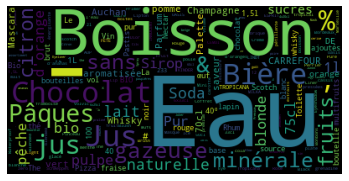

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Converting test to sequence of words
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
nltk.download('stopwords')

# define the document
result=[]
tokens = []
for i,produit in enumerate(new_dftext.nomProduit.values):
  # tokenize the document
  words = text_to_word_sequence(produit,filters='!”$()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
  stop_words = set(stopwords.words('french'))
  words = [w for w in words if not w in stop_words]
  tokens += [w for w in words]
  result.append(words)

print(result[0:5])
new_dftext['nomProduit']=result


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['pressade', 'nectar', 'thé', 'pêche', 'bio', '6x20cl'], ['andros', 'pur', 'jus', "d'oranges", 'pressées', 'pulpe', '1l'], ['tropicana', 'pure', 'premium', 'jus', 'pommes', 'pressées', '1l'], ['tropicana', 'pur', 'jus', 'ananas', 'citron', 'vert', '1l'], ['innocent', 'pur', 'jus', "d'oranges", 'sanguines', '90cl']]


In [ ]:
new_dftext.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,"[pressade, nectar, thé, pêche, bio, 6x20cl]",PRESSADE,Epicerie sucrée,Bio & Ecolo,Boissons à base de thé
1,11316,"[andros, pur, jus, d'oranges, pressées, pulpe,...",ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
2,11322,"[tropicana, pure, premium, jus, pommes, pressé...",TROPICANA,Jus d'orange,Fruits & légumes,Jus de pomme
3,11324,"[tropicana, pur, jus, ananas, citron, vert, 1l]",TROPICANA,Jus d'orange,Fruits & légumes,Mélanges de fruits
4,188,"[innocent, pur, jus, d'oranges, sanguines, 90cl]",INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
5,192,"[innocent, pur, jus, d'oranges, pulpe, 90cl]",INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
6,178,"[innocent, pur, jus, d'oranges, sans, pulpe, 9...",INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
7,139524,"[andros, pur, jus, d'oranges, sans, pulpe, 1l]",ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
8,223606,"[andros, pur, jus, d'oranges, pressées, sans, ...",ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
9,202,"[tropicana, pur, jus, d'oranges, pressées, pul...",TROPICANA,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange


In [ ]:
len(set(tokens)) #vocab_size

3307

In [ ]:
# Defining word_to_id mapping words to integers
tmp_vocabulary = set(tokens)
vocabulary = list(set(tokens))
vocabulary += ['<START>','<UKN>','<END>','<PAD>']

vocab_size = len(vocabulary)
print(vocab_size)
word_to_id = {}
word_to_id['<PAD>']=0
word_to_id['<START>']=1
word_to_id['<UKN>']=2
word_to_id['<END>']=3
for i, c in enumerate(tmp_vocabulary):
  word_to_id[c]=i+4
word_to_id

3311


{'<PAD>': 0,
 '<START>': 1,
 '<UKN>': 2,
 '<END>': 3,
 'frontal': 4,
 'corse': 5,
 'alchemist': 6,
 'versant': 7,
 'chinois': 8,
 'mettre': 9,
 'guilty': 10,
 'awake': 11,
 'rides': 12,
 'badoit': 13,
 'chocolaté': 14,
 '2017': 15,
 '2019': 16,
 "daniel's": 17,
 'uomo': 18,
 'pamplelune': 19,
 'bières': 20,
 'carionmerlot': 21,
 'grimbergen': 22,
 'deal': 23,
 '12x33cl': 24,
 'finest40%vol': 25,
 'heaven': 26,
 'but': 27,
 'cochon': 28,
 'sill1l': 29,
 'angelo': 30,
 'impérial': 31,
 '25cl': 32,
 'emporio': 33,
 'forever': 34,
 'france"': 35,
 'hydration': 36,
 'hour®': 37,
 'melange': 38,
 'lemonbouteille': 39,
 'apple': 40,
 'fiction': 41,
 'kilian': 42,
 'luminizing': 43,
 'home': 44,
 'fake': 45,
 'agrum&#39': 46,
 'intensément': 47,
 "j'adore": 48,
 'lansonbrut': 49,
 'raclette': 50,
 'nutri': 51,
 'obsessed': 52,
 'syrah': 53,
 'clarifiante': 54,
 'pocket': 55,
 'toilette': 56,
 'ozone': 57,
 'hydratante': 58,
 'miss': 59,
 'town': 60,
 'fairies': 61,
 'pressée': 62,
 'citron': 6

In [ ]:
# Converting categories to labels
df_category = new_dftext['category'].unique()
category_to_id = {}
for i, c in enumerate(df_category):
  category_to_id[c]=i
category_to_id['biscuits au chocolat']=44
print(category_to_id)
print(f"size = {len(category_to_id)}")

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 'biscuits au chocolat': 44}
size = 45


In [ ]:
df_marque = new_dftext['marque'].unique()
marque_to_id = {}
for i, c in enumerate(df_marque):
  marque_to_id[c]=i

In [ ]:
df_fd = new_dftext['famille_drive'].unique()
fd_to_id = {}
for i, c in enumerate(df_fd):
  fd_to_id[c]=i

In [ ]:
df_rd = new_dftext['rayon_drive'].unique()
rd_to_id = {}
for i, c in enumerate(df_rd):
  rd_to_id[c]=i

In [ ]:
category = [category_to_id[c] for c in new_dftext.category]
new_dftext.category = category
category[0:5]

[0, 1, 2, 3, 1]

In [ ]:
new_dftext.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,"[pressade, nectar, thé, pêche, bio, 6x20cl]",PRESSADE,Epicerie sucrée,Bio & Ecolo,0
1,11316,"[andros, pur, jus, d'oranges, pressées, pulpe,...",ANDROS,Jus d'orange,Fruits & légumes,1
2,11322,"[tropicana, pure, premium, jus, pommes, pressé...",TROPICANA,Jus d'orange,Fruits & légumes,2
3,11324,"[tropicana, pur, jus, ananas, citron, vert, 1l]",TROPICANA,Jus d'orange,Fruits & légumes,3
4,188,"[innocent, pur, jus, d'oranges, sanguines, 90cl]",INNOCENT,Jus d'orange,Fruits & légumes,1
5,192,"[innocent, pur, jus, d'oranges, pulpe, 90cl]",INNOCENT,Jus d'orange,Fruits & légumes,1
6,178,"[innocent, pur, jus, d'oranges, sans, pulpe, 9...",INNOCENT,Jus d'orange,Fruits & légumes,1
7,139524,"[andros, pur, jus, d'oranges, sans, pulpe, 1l]",ANDROS,Jus d'orange,Fruits & légumes,1
8,223606,"[andros, pur, jus, d'oranges, pressées, sans, ...",ANDROS,Jus d'orange,Fruits & légumes,1
9,202,"[tropicana, pur, jus, d'oranges, pressées, pul...",TROPICANA,Jus d'orange,Fruits & légumes,1


In [ ]:
# Label Encoding of marque, famille_drive and rayon_drive

le_marque = [marque_to_id[c] for c in new_dftext.marque]
new_dftext.marque = le_marque

le_familledrive = [fd_to_id[c] for c in new_dftext.famille_drive]
new_dftext.famille_drive = le_familledrive

le_rayondrive = [rd_to_id[c] for c in new_dftext.rayon_drive]
new_dftext.rayon_drive = le_rayondrive


new_dftext.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,"[1, 2285, 2646, 1136, 1766, 162, 850]",0,0,0,0
1,11316,"[1, 1367, 2351, 3160, 2305, 557, 2011, 1780]",1,1,1,1
2,11322,"[1, 1801, 1764, 139, 3160, 2791, 557, 1780]",2,1,1,2
3,11324,"[1, 1801, 2351, 3160, 1050, 63, 2235, 1780]",2,1,1,3
4,188,"[1, 2128, 2351, 3160, 2305, 2900, 2990]",3,1,1,1
5,192,"[1, 2128, 2351, 3160, 2305, 2011, 2990]",3,1,1,1
6,178,"[1, 2128, 2351, 3160, 2305, 2041, 2011, 2990]",3,1,1,1
7,139524,"[1, 1367, 2351, 3160, 2305, 2041, 2011, 1780]",1,1,1,1
8,223606,"[1, 1367, 2351, 3160, 2305, 557, 2041, 120, 16...",1,1,1,1
9,202,"[1, 1801, 2351, 3160, 2305, 557, 2011, 2837, 1...",2,1,1,1


In [ ]:
# Creating the sequence of integers to feed the RNN
sequence_of_id = []
for sequence in new_dftext.nomProduit:
  sequence_of_id.append([1] + [word_to_id[w] if w in word_to_id else 2 for w in sequence ] )
new_dftext.nomProduit = sequence_of_id

new_dftext.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,"[1, 2285, 2646, 1136, 1766, 162, 850]",529,169,4,0
1,11316,"[1, 1367, 2351, 3160, 2305, 557, 2011, 1780]",18,201,20,1
2,11322,"[1, 1801, 1764, 139, 3160, 2791, 557, 1780]",647,201,20,2
3,11324,"[1, 1801, 2351, 3160, 1050, 63, 2235, 1780]",647,201,20,3
4,188,"[1, 2128, 2351, 3160, 2305, 2900, 2990]",304,201,20,1
5,192,"[1, 2128, 2351, 3160, 2305, 2011, 2990]",304,201,20,1
6,178,"[1, 2128, 2351, 3160, 2305, 2041, 2011, 2990]",304,201,20,1
7,139524,"[1, 1367, 2351, 3160, 2305, 2041, 2011, 1780]",18,201,20,1
8,223606,"[1, 1367, 2351, 3160, 2305, 557, 2041, 120, 16...",18,201,20,1
9,202,"[1, 1801, 2351, 3160, 2305, 557, 2011, 2837, 1...",647,201,20,1


In [ ]:
# Longest sentences 
nomProduit_ = new_dftext.nomProduit.values
nomProduit_ = np.array(nomProduit_,dtype=np.ndarray)
maxLen = len(max(nomProduit_, key=len))
maxLen


15

In [ ]:
# plot the histogram of the charges
import tensorflow as tf 
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, concatenate, Activation, BatchNormalization
from tensorflow.keras.layers import Embedding, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import TensorBoard
from keras.preprocessing import sequence

In [ ]:
from sklearn.model_selection import train_test_split
new_dftext_train, new_dftext_test = train_test_split(new_dftext, test_size=0.1, random_state=42, shuffle=True)
new_dftext_train.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
3205,195348,"[1, 1927, 1990, 1914]",141,124,8,12
2909,70085,"[1, 2295, 1824, 2457, 765, 1019]",376,106,1,19
2044,6907,"[1, 1736, 1136, 2235, 3039, 2986, 1780]",474,361,6,0
2377,292455,"[1, 595, 2552]",291,4,6,27
1056,385483,"[1, 2805, 2120, 3068, 3216]",584,268,28,36
3921,79018,"[1, 1008, 3267, 395, 1904, 2941, 1704, 1562]",579,163,6,6
69,10573,"[1, 466, 966, 2222, 2203, 1766, 2837, 1014]",392,124,6,0
1507,390302,"[1, 1132, 3280, 903, 2368, 661]",523,171,36,37
45,6376,"[1, 2209, 2351, 3160, 574, 2011, 1780]",25,265,6,1
3472,389796,"[1, 59, 1988, 1008, 56, 878, 1048]",190,271,30,39


In [ ]:
nomProduit_train = new_dftext_train.nomProduit.values
nomProduit_test = new_dftext_test.nomProduit.values
nomProduit_train = np.array(nomProduit_train,dtype=np.ndarray)
nomProduit_test = np.array(nomProduit_test,dtype=np.ndarray)
maxLen = len(max((nomProduit_train), key=len))
if maxLen < len(max((nomProduit_test), key=len)):
  maxLen = len(max((nomProduit_test), key=len))
maxLen = maxLen +1 #appending the <END>
maxLen

16

In [ ]:
def pad_sequences(X, word_to_index, max_len):
  m = X.shape[0]
  X_indices = np.zeros((m,max_len),dtype=int)
  for i in range(m):
    j = 0
    for w in X[i]:
      X_indices[i, j] = int(w)
      j += 1
    X_indices[i, max_len-1] = 3
  return np.array(X_indices)


In [ ]:
# We need to feed the NN with indentical shape so we pad every sentence shorter than maxLen with zeros 
nomProduit_train = pad_sequences(nomProduit_train, word_to_id, 20)
nomProduit_test = pad_sequences(nomProduit_test, word_to_id, 20)
nomProduit_train

array([[   1, 1927, 1990, ...,    0,    0,    3],
       [   1, 2295, 1824, ...,    0,    0,    3],
       [   1, 1736, 1136, ...,    0,    0,    3],
       ...,
       [   1, 2590, 1003, ...,    0,    0,    3],
       [   1, 1554,  874, ...,    0,    0,    3],
       [   1, 3160, 1975, ...,    0,    0,    3]])

In [ ]:
# Normalizing other attributes
other_train = new_dftext_train[['marque','famille_drive','rayon_drive']].values
other_test = new_dftext_test[['marque','famille_drive','rayon_drive']].values
other_train = preprocessing.normalize(other_train)
other_test = preprocessing.normalize(other_test)
other_train

array([[0.75024415, 0.65978918, 0.04256704],
       [0.96248081, 0.27133768, 0.00255979],
       [0.79550695, 0.60586078, 0.01006971],
       ...,
       [0.48267571, 0.87022556, 0.09864905],
       [0.95132739, 0.28086809, 0.12684365],
       [0.41755194, 0.90807411, 0.03243122]])

In [ ]:
cat_ = new_dftext_train.category.values.tolist()
cat_.append(44)
cat_ = np.array(cat_)

In [ ]:
# One hot encoding the category column
from keras.utils import to_categorical


encoded_category_train = to_categorical(cat_)
encoded_category_test = to_categorical(cat_)

encoded_category_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
output_size = encoded_category_train.shape[1]
output_size

44

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size+1, 50, input_length=20))

model.add(LSTM(256, input_shape=((20,50)),return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(256, input_shape=((20,50)),return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(LSTM(256, input_shape=((20,50)),return_sequences=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(output_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 50)            165600    
_________________________________________________________________
lstm (LSTM)                  (None, 16, 256)           314368    
_________________________________________________________________
dropout (Dropout)            (None, 16, 256)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 256)           1024      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 256)           1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
training_size = nomProduit_train.shape[0]
nomProduit_valid, other_valid,encoded_category_valid = nomProduit_train[:int(training_size*0.09)], other_train[:int(training_size*0.09)],encoded_category_train[:int(training_size*0.09)]
nomProduit_train2, other_train2,encoded_category_train2 = nomProduit_train[int(training_size*0.09):], other_train[int(training_size*0.09):],encoded_category_train[int(training_size*0.09):]


In [ ]:
model.fit(nomProduit_train2, encoded_category_train2,validation_data=(nomProduit_valid,encoded_category_valid), epochs = 40, batch_size=64)

Epoch 1/40
51/51 [==============================] - 2s 34ms/step - loss: 2.6898 - accuracy: 0.3135 - val_loss: 3.7472 - val_accuracy: 0.0374
Epoch 2/40
51/51 [==============================] - 1s 12ms/step - loss: 1.4654 - accuracy: 0.5762 - val_loss: 3.6556 - val_accuracy: 0.1340
Epoch 3/40
51/51 [==============================] - 1s 12ms/step - loss: 0.9331 - accuracy: 0.7157 - val_loss: 3.5116 - val_accuracy: 0.0685
Epoch 4/40
51/51 [==============================] - 1s 12ms/step - loss: 0.6225 - accuracy: 0.8085 - val_loss: 3.2739 - val_accuracy: 0.1464
Epoch 5/40
51/51 [==============================] - 1s 14ms/step - loss: 0.4816 - accuracy: 0.8460 - val_loss: 3.2985 - val_accuracy: 0.1215
Epoch 6/40
51/51 [==============================] - 1s 13ms/step - loss: 0.4203 - accuracy: 0.8700 - val_loss: 2.9029 - val_accuracy: 0.1558
Epoch 7/40
51/51 [==============================] - 1s 13ms/step - loss: 0.3508 - accuracy: 0.8888 - val_loss: 2.8184 - val_accuracy: 0.2960
Epoch 8/40
51

In [ ]:
pred = model.predict(nomProduit_test)

In [ ]:
np.argmax(pred[0]) == category_test[0]

True

In [ ]:
loss, acc = model.evaluate(nomProduit_test, encoded_category_test)

13/13 [==============================] - 0s 6ms/step - loss: 1.9217 - accuracy: 0.6533


In [ ]:
np.argmax(pred[31])

40

In [ ]:
category_test[31]

42

In [ ]:
nomProduit = Input(shape=(20,))
nomProduitlayers = Embedding(vocab_size+1, 50, input_length=20)(nomProduit)
nomProduitlayers = LSTM(256, input_shape=((20,50)),return_sequences=True)(nomProduitlayers)
nomProduitlayers = Dropout(0.2)(nomProduitlayers)
nomProduitlayers = BatchNormalization()(nomProduitlayers)

nomProduitlayers = LSTM(256, input_shape=((20,50)),return_sequences=True)(nomProduitlayers)
nomProduitlayers = Dropout(0.1)(nomProduitlayers)
nomProduitlayers = BatchNormalization()(nomProduitlayers)

nomProduitlayers = LSTM(256, input_shape=((20,50)),return_sequences=False)(nomProduitlayers)
nomProduitlayers = Dropout(0.1)(nomProduitlayers)
nomProduitlayers = BatchNormalization()(nomProduitlayers)

nomProduit_output = Dense(96, activation='relu')(nomProduitlayers)
nomProduit_output = Dropout(0.1)(nomProduit_output)

other = Input(shape=(3,1))
otherlayer = LSTM(256, input_shape=((3,1)))(other)
otherlayer = Dropout(0.1)(otherlayer)
otherlayer = BatchNormalization()(otherlayer)

other_output = Dense(32, activation='relu')(otherlayer)
other_output = Dropout(0.1)(other_output)

output = concatenate([nomProduit_output,other_output])
output = Dense(64, activation='relu')(output)
output = Dropout(0.1)(output)

output = Dense(output_size, activation='softmax')(output)

model = Model([nomProduit, other], output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 16, 50)       165600      input_3[0][0]                    
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 16, 256)      314368      embedding_2[0][0]                
__________________________________________________________________________________________________
dropout_11 (Dropout)            (None, 16, 256)      0           lstm_7[0][0]                     
_______________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit([nomProduit_train2,other_train2], encoded_category_train2,validation_data=([nomProduit_valid,other_valid],encoded_category_valid), epochs = 40, batch_size = 64)

Epoch 1/40
51/51 [==============================] - 2s 42ms/step - loss: 3.1124 - accuracy: 0.2262 - val_loss: 3.7503 - val_accuracy: 0.0654
Epoch 2/40
51/51 [==============================] - 1s 17ms/step - loss: 1.8966 - accuracy: 0.4871 - val_loss: 3.6598 - val_accuracy: 0.0810
Epoch 3/40
51/51 [==============================] - 1s 14ms/step - loss: 1.2605 - accuracy: 0.6223 - val_loss: 3.4814 - val_accuracy: 0.1153
Epoch 4/40
51/51 [==============================] - 1s 15ms/step - loss: 0.9445 - accuracy: 0.7105 - val_loss: 3.1647 - val_accuracy: 0.1433
Epoch 5/40
51/51 [==============================] - 1s 15ms/step - loss: 0.7793 - accuracy: 0.7541 - val_loss: 3.0609 - val_accuracy: 0.1807
Epoch 6/40
51/51 [==============================] - 1s 14ms/step - loss: 0.6243 - accuracy: 0.8036 - val_loss: 2.4187 - val_accuracy: 0.3333
Epoch 7/40
51/51 [==============================] - 1s 15ms/step - loss: 0.5311 - accuracy: 0.8359 - val_loss: 1.7017 - val_accuracy: 0.4829
Epoch 8/40
51

In [ ]:
loss, acc = model.evaluate([nomProduit_test,other_test], encoded_category_test)
acc

13/13 [==============================] - 0s 6ms/step - loss: 1.8102 - accuracy: 0.6935


0.6934673190116882

In [ ]:
pred = model.predict([nomProduit_test,other_test])


In [ ]:
np.sum(pred[0])


1.0

In [ ]:
np.argmax(pred[31])

20

In [ ]:
category_test[31]

42

In [ ]:
# Loading Image Dataset
df_image = pd.read_csv('/content/prd_classification_image.csv')
df_image.head(10)

,id,url
0,166,https://media.auchan.fr/MEDIASTEP73419569_165x...
1,2810,https://media.auchan.fr/MEDIASTEP57433119_165x...
2,3131,https://media.auchan.fr/MEDIASTEP61167474_460x...
3,3146,https://media.auchan.fr/MEDIASTEP57975980_165x...
4,6395,https://media.auchan.fr/MEDIASTEP67195204_165x...
5,6464,https://media.auchan.fr/MEDIASTEP61854876_460x...
6,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...
7,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...
8,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...
9,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...


In [ ]:
# Dealing with missing values
df_image.isnull().sum()

id       0
url    136
dtype: int64

In [ ]:
df_image.dropna(inplace=True)
df_image.isnull().sum()

id     0
url    0
dtype: int64

In [ ]:
df_text.head(10)

,id,nomProduit,marque,famille_drive,rayon_drive,category
0,9632,Pressade nectar de thé à la pêche bio 6x20cl,PRESSADE,Epicerie sucrée,Bio & Ecolo,Boissons à base de thé
1,11316,Andros Pur jus d'oranges pressées avec pulpe 1L,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
2,11322,Tropicana pure premium jus de pommes pressées 1l,TROPICANA,Jus d'orange,Fruits & légumes,Jus de pomme
3,11324,Tropicana pur jus ananas citron vert 1l,TROPICANA,Jus d'orange,Fruits & légumes,Mélanges de fruits
4,188,Innocent Pur jus d'oranges sanguines 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
5,192,Innocent Pur jus d'oranges avec pulpe 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
6,178,Innocent Pur jus d'oranges sans pulpe 90cl,INNOCENT,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
7,139524,Andros Pur jus d'oranges sans pulpe 1L,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
8,223606,ANDROS Pur jus d'oranges pressées sans sucres ...,ANDROS,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange
9,202,Tropicana Pur jus d'oranges pressées avec pulp...,TROPICANA,Jus d'orange,Fruits & légumes,Jus et nectars à l'orange


In [ ]:
# Merging the 2 Datasets
newdf_image = df_image.merge(new_dftext,on="id", how = 'inner')
newdf_image.shape

(110772, 7)

In [ ]:
# Merging the 2 Datasets for testing equality
newdf_image_2 = df_image.merge(df_text,on="id", how = 'inner')
newdf_image_2.head(10)

,id,url,nomProduit,marque,famille_drive,rayon_drive,category
0,166,https://media.auchan.fr/MEDIASTEP73419569_165x...,"Andros Jus de pommes 1,5L",ANDROS,Softs,C'est l'été,Jus de pomme
1,2810,https://media.auchan.fr/MEDIASTEP57433119_165x...,Auchan bio pur jus de fruits du verger brique 1l,AUCHAN,Multifruits,Boissons,Jus de pomme
2,3131,https://media.auchan.fr/MEDIASTEP61167474_460x...,Rik & Rok pur jus de pomme bio 4x20cl,RIK ET ROK,Monofruit,Boissons,Jus de pomme
3,3146,https://media.auchan.fr/MEDIASTEP57975980_165x...,Thomas le prince Pur jus de pomme poire bio bo...,THOMAS LE PRINCE,Boissons sans alcool,Bio & Ecolo,Jus de pomme
4,6395,https://media.auchan.fr/MEDIASTEP67195204_165x...,Auchan Pur jus de pomme trouble 1l,AUCHAN,Monofruit,Boissons,Jus de pomme
5,6464,https://media.auchan.fr/MEDIASTEP61854876_460x...,Pressade pocket abc pomme 8x20cl,PRESSADE,Orange,Boissons,Jus de pomme
6,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...,"Pressade Jus de pomme bonjour brique 1,5l",PRESSADE,Monofruit,Boissons,Jus de pomme
7,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...,"Pressade Jus de pomme bonjour brique 1,5l",PRESSADE,Monofruit,Boissons,Jus de pomme
8,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...,"Pressade Jus de pomme bonjour brique 1,5l",PRESSADE,Monofruit,Boissons,Jus de pomme
9,6465,https://media.auchan.fr/MEDIASTEP57433204_165x...,"Pressade Jus de pomme bonjour brique 1,5l",PRESSADE,Monofruit,Boissons,Jus de pomme


In [ ]:
# Testing to see that the data didn't shuffle while merging
id_to_word = {val:key for key,val in word_to_id.items()}
for j in range(5):
  print([id_to_word[i] for i in newdf_image.nomProduit.values[j]])

['<START>', 'andros', 'jus', 'pommes', '1', '5l']
['<START>', 'auchan', 'bio', 'pur', 'jus', 'fruits', 'verger', 'brique', '1l']
['<START>', 'rik', '&', 'rok', 'pur', 'jus', 'pomme', 'bio', '4x20cl']
['<START>', 'thomas', 'prince', 'pur', 'jus', 'pomme', 'poire', 'bio', 'bouteille', 'verre', '1l']
['<START>', 'auchan', 'pur', 'jus', 'pomme', 'trouble', '1l']


In [ ]:
for j in range(5):
  print(newdf_image_2.nomProduit.values[j].split())

['Andros', 'Jus', 'de', 'pommes', '1,5L']
['Auchan', 'bio', 'pur', 'jus', 'de', 'fruits', 'du', 'verger', 'brique', '1l']
['Rik', '&', 'Rok', 'pur', 'jus', 'de', 'pomme', 'bio', '4x20cl']
['Thomas', 'le', 'prince', 'Pur', 'jus', 'de', 'pomme', 'poire', 'bio', 'bouteille', 'verre', '1l']
['Auchan', 'Pur', 'jus', 'de', 'pomme', 'trouble', '1l']


In [ ]:
newdf_image.isnull().sum()

id               0
url              0
nomProduit       0
marque           0
famille_drive    0
rayon_drive      0
category         0
dtype: int64

In [ ]:
# delete the directory
#import shutil
#shutil.rmtree('/content/drive/My Drve/product')

In [ ]:
# Downloading Images

import requests # to get image from the web
import shutil # to save it locally
import os

if not os.path.isdir('/content/drive/My Drive/product'): 
  os.mkdir('/content/drive/My Drive/product') 
timed_out = open('/content/drive/My Drive/Timedout.txt','a')
i = 0
while i < newdf_image['url'].values.size:
  ## Set up the image URL and filename
  image_url = newdf_image['url'].values[i]
  if 'http' not in image_url:
    i += 1
    continue 
  image_url = image_url.encode('ascii', 'ignore').decode('ascii')
  filename = '/content/drive/My Drive/product/' + str(i) + '.jpg'
  try:
    # Open the url image, set stream to True, this will return the stream content.
    r = requests.get(image_url,timeout = 5, stream = True)

    # Check if the image was retrieved successfully
    if r.status_code == 200:
        # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
        r.raw.decode_content = True
        
        # Open a local file with wb ( write binary ) permission.
        with open(filename,'wb') as f:
            shutil.copyfileobj(r.raw, f)
        if i % 10000 == 0:    
          print(f'Image {i} sucessfully Downloaded: ',filename)
    else:
        print('Image Couldn\'t be retreived')
  except Exception as e:
    timed_out.write(image_url+' '+str(i)+' \n')
    print(f'Timed out {i}')
  i += 1

In [ ]:
import requests # to get image from the web
import shutil # to save it locally
import os

if not os.path.isdir('/content'): 
  os.mkdir('/content') 
image_url = newdf_image['url'].values[72616]
image_url = image_url.encode('ascii', 'ignore').decode('ascii')
filename = '/content/' + str(72616) + '.jpg'
r = requests.get(image_url, stream = True)
r.raw.decode_content = True
      
      # Open a local file with wb ( write binary ) permission.
with open(filename,'wb') as f:
  shutil.copyfileobj(r.raw, f)
  print(f'Image {72616} sucessfully Downloaded: ',filename)

Image 72616 sucessfully Downloaded:  /content72616.jpg


In [ ]:
newdf_image.at[6,'url']

(110772, 7)

In [ ]:
import requests # to get image from the web
import shutil # to save it locally
import os

if not os.path.isdir('/content/product'): 
  os.mkdir('/content/product') 

to = open("/content/timedout_2.txt","r")
tmp_list = to.readlines()
print(tmp_list)
i = 0
for tmp in tmp_list:
  list_tmp = tmp.split()
  ## Set up the image URL and filename
  image_id = int(list_tmp[1][:-1])
  image_url = newdf_image.at[image_id,'url']
  if 'http' not in image_url:
    i += 1
    continue 
  image_url = image_url.encode('ascii', 'ignore').decode('ascii')
  filename = '/content/product/' + str(image_id) + '.jpg'

  # Open the url image, set stream to True, this will return the stream content.
  r = requests.get(image_url, stream = True)

  # Check if the image was retrieved successfully
  if r.status_code == 200:
      # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
      r.raw.decode_content = True
      
      # Open a local file with wb ( write binary ) permission.
      with open(filename,'wb') as f:
          shutil.copyfileobj(r.raw, f)
      if i % 100 == 0:    
        print(f'Image {image_id} sucessfully Downloaded: ',filename)
  else:
      print('Image Couldn\'t be retreived')
  i += 1

In [ ]:
from google.colab import files
import os
#files.upload()
list_ = os.listdir('/content/drive/My Drive/product')
len(list_) # number of pictures


OSError: ignored

In [ ]:
newdf_image.url.values.size

110772

In [ ]:
newdf_image.head()

,id,url,nomProduit,marque,famille_drive,rayon_drive,category
0,166,https://media.auchan.fr/MEDIASTEP73419569_165x...,"[1, 125, 2728, 759, 1408, 223]",18,336,10,2
1,2810,https://media.auchan.fr/MEDIASTEP57433119_165x...,"[1, 1956, 424, 1723, 2728, 2089, 1443, 2252, 464]",25,257,6,2
2,3131,https://media.auchan.fr/MEDIASTEP61167474_460x...,"[1, 2467, 1311, 161, 1723, 2728, 822, 424, 2507]",555,254,6,2
3,3146,https://media.auchan.fr/MEDIASTEP57975980_165x...,"[1, 181, 2108, 1723, 2728, 822, 896, 424, 2296...",637,82,4,2
4,6395,https://media.auchan.fr/MEDIASTEP67195204_165x...,"[1, 1956, 1723, 2728, 822, 1817, 464]",25,254,6,2


109770


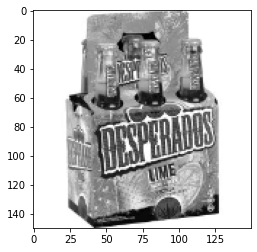

(150, 150)
109771


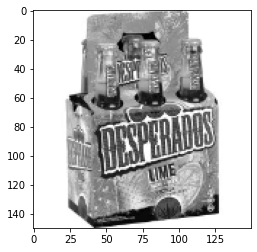

(150, 150)
109772


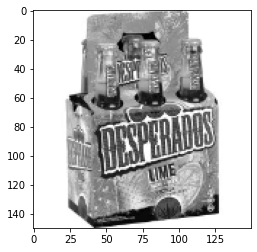

(150, 150)
109773


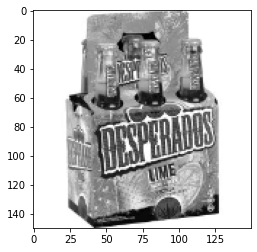

(150, 150)
109774


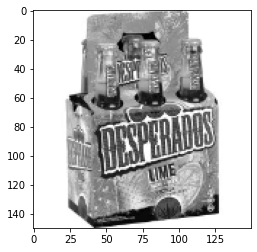

(150, 150)
109775


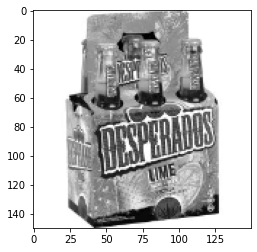

(150, 150)


In [ ]:
import cv2
import matplotlib.pyplot as plt 

data = []
c = 0
path = '/content/drive/My Drive/product'
for img in os.listdir(path):
  index = img[:-4]
  print(index)
  img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(150,150))
  #data.append(new_array)
  plt.imshow(new_array,cmap="gray")
  plt.show()
  print(new_array.shape)
  if c==5:
    break
  c += 1

In [ ]:
newdf_image_2.at[109775,'nomProduit']

'Lime - Bière aromatisée Tequila citron vert cactus'

In [ ]:
nomProduit_ = newdf_image.nomProduit.values
nomProduit_ = np.array(nomProduit_,dtype=np.ndarray)
nomProduit_ = pad_sequences(nomProduit_, word_to_id, 20)

other_ = newdf_image[['marque','famille_drive','rayon_drive']].values
other_ = preprocessing.normalize(other_)


category_ = newdf_image.category.values.tolist()
category_.append(44)
category_ = np.array(category_)
encoded_category_ = to_categorical(category_)

In [ ]:
id_to_category = {val:key for key,val in category_to_id.items()}
id_to_category[category_[109775]]

'Bières spéciales'

In [ ]:
id_to_category[newdf_image.at[109775,'category']]

'Bières spéciales'

In [ ]:
product_listdir = os.listdir('/content/drive/My Drive/product')
product_listdir[0:5]

['109770.jpg', '109771.jpg', '109772.jpg', '109773.jpg', '109774.jpg']

In [ ]:
data_sample = []
img_array_to_id = [] # To get the id so we can search in the dataset for the category(later use)

In [ ]:
Image_size= 50 # we want every shape of every image to be similar

In [ ]:
#import cv2
#import matplotlib.pyplot as plt 


Image_size= 50
path = '/content/drive/My Drive/product'
a = 0
for img in product_listdir:
  try:
    index = int(img[:-4])
    img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)    
    new_array = cv2.resize(img_array,(Image_size,Image_size))
    img_array_to_id.append((new_array,index))
    data_sample.append([new_array,nomProduit_[index],other_[index],encoded_category_[index]])
    if a % 2000 == 0:
      print(f'Image {a} uploaded')
  except Exception as e:
    print(f'Error {a}')
  a += 1

In [ ]:
i = 0
while i < len(data_sample):
  t = data_sample[i][1].tolist()
  n = t.pop()
  t = t + [ 0 , 0 , 0 ,0 , n]
  data_sample[i][1] = np.array(t)
  i = i + 1

In [ ]:
i = 0
while i < len(data_sample):
  t = data_sample[i][3].tolist()
  t.append(0)
  data_sample[i][3] = np.array(t)
  i = i + 1

In [ ]:
len(data_sample[1][3])

45

In [ ]:
img_array_to_id[0:5]

[(array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 109770),
 (array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 109771),
 (array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 109772),
 (array([[255, 255, 255, ..., 255, 255, 255],
         [25

In [ ]:
import random
random.shuffle(data_sample)

In [ ]:
import pickle

#Saving data_sample and img_array_to_id variables we don't need to resize them at every attempt

#pickle_out = open('/content/drive/My Drive/data_sample.pickle','wb')
#pickle.dump(data_sample,pickle_out)
#pickle_out.close()

#pickle_out = open('/content/drive/My Drive/img_array_to_id.pickle','wb')
#pickle.dump(img_array_to_id,pickle_out)
#pickle_out.close()

In [ ]:
prickle_in = open('/content/drive/My Drive/data_sample.pickle','rb')
data_sample = pickle.load(prickle_in)

prickle_in = open('/content/drive/My Drive/img_array_to_id.pickle','rb')
img_array_to_id = pickle.load(prickle_in)

In [ ]:
from sklearn.model_selection import train_test_split
data_sample_train, data_sample_test = train_test_split(data_sample, test_size=0.1, random_state=42, shuffle=True)
data_sample_train[0:5]

[[array([[255, 255, 255, ..., 254, 254, 255],
         [254, 254, 254, ..., 254, 254, 254],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [254, 254, 254, ..., 254, 254, 254],
         [254, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([   1, 3270, 2496, 1632,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    3]),
  array([0.64174522, 0.76691533, 0.00198683]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 [array([[255, 255, 255, ..., 254, 254, 255],
         [254, 254, 254, ..., 254, 254, 254],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [254, 254, 254, ..., 254, 254, 254],
         [254, 255, 255, ..., 255, 255, 255]], dtype=u

In [ ]:
nomProduit_finaltrain = []
nomProduit_finaltest = []

other_finaltrain = []
other_finaltest = []

url_finaltrain = []
url_finaltest = []

encoded_category_finaltrain = []
encoded_category_finaltest = []


In [ ]:
for url, nP, other, category in data_sample_train:
  url_finaltrain.append(url)
  nomProduit_finaltrain.append(nP)
  other_finaltrain.append(other)
  encoded_category_finaltrain.append(category)

url_finaltrain = np.array(url_finaltrain).reshape(-1 , Image_size , Image_size , 1 )
nomProduit_finaltrain = np.array(nomProduit_finaltrain)
other_finaltrain = np.array(other_finaltrain)
encoded_category_finaltrain = np.array(encoded_category_finaltrain)

In [ ]:
encoded_category_finaltrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for url, nP, other, category in data_sample_test:
  url_finaltest.append(url)
  nomProduit_finaltest.append(nP)
  other_finaltest.append(other)
  encoded_category_finaltest.append(category)

url_finaltest = np.array(url_finaltest).reshape(-1 , Image_size , Image_size , 1 )
nomProduit_finaltest = np.array(nomProduit_finaltest)
other_finaltest = np.array(other_finaltest)
encoded_category_finaltest = np.array(encoded_category_finaltest)

In [ ]:
training_size = nomProduit_finaltrain.shape[0]
url_finalvalid, nomProduit_finalvalid, other_finalvalid,encoded_category_finalvalid =url_finaltrain[:int(training_size*0.09)], nomProduit_finaltrain[:int(training_size*0.09)], other_finaltrain[:int(training_size*0.09)],encoded_category_finaltrain[:int(training_size*0.09)]
url_finaltrain2, nomProduit_finaltrain2, other_finaltrain2,encoded_category_finaltrain2 = url_finaltrain[int(training_size*0.09):], nomProduit_finaltrain[int(training_size*0.09):], other_finaltrain[int(training_size*0.09):],encoded_category_finaltrain[int(training_size*0.09):]


In [ ]:
model_1 = Sequential()
model.add(Conv2D(128 , (3,3) , input_shape= url_finaltrain2.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256 , (3,3) , input_shape= url_finaltrain2.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(45))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 256)       295168    
_________________________________________________________________
activation_7 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(url_finaltrain2, encoded_category_finaltrain2,validation_data=(url_finalvalid,encoded_category_finalvalid), epochs = 10, batch_size=32)

Epoch 1/40
1404/1404 [==============================] - 20s 15ms/step - loss: 0.8531 - accuracy: 0.9289 - val_loss: 0.1007 - val_accuracy: 0.9787
Epoch 2/40
1404/1404 [==============================] - 21s 15ms/step - loss: 0.0779 - accuracy: 0.9827 - val_loss: 0.0800 - val_accuracy: 0.9829
Epoch 3/40
1404/1404 [==============================] - 20s 15ms/step - loss: 0.0563 - accuracy: 0.9865 - val_loss: 0.1040 - val_accuracy: 0.9821
Epoch 4/40
1404/1404 [==============================] - 20s 14ms/step - loss: 0.0503 - accuracy: 0.9887 - val_loss: 0.1103 - val_accuracy: 0.9823
Epoch 5/40
1404/1404 [==============================] - 20s 14ms/step - loss: 0.0550 - accuracy: 0.9875 - val_loss: 0.1225 - val_accuracy: 0.9811
Epoch 6/40
1404/1404 [==============================] - 20s 14ms/step - loss: 0.0357 - accuracy: 0.9921 - val_loss: 0.1062 - val_accuracy: 0.9827
Epoch 7/40
1404/1404 [==============================] - 20s 14ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 0.1454 -

In [ ]:
loss, acc = model.evaluate(url_finaltest, encoded_category_finaltest)

343/343 [==============================] - 1s 4ms/step - loss: 0.6065 - accuracy: 0.9840


In [ ]:
pred = model.predict(url_finaltest)
np.argmax(pred[2])

24

In [ ]:
np.argmax(encoded_category_finaltest[2])

24

In [ ]:
#Final Model

nomProduit = Input(shape=(20,))
nomProduitlayers = Embedding(vocab_size+1, 50, input_length=20)(nomProduit)
nomProduitlayers = LSTM(256, input_shape=((20,50)),return_sequences=True)(nomProduitlayers)
nomProduitlayers = Dropout(0.2)(nomProduitlayers)
nomProduitlayers = BatchNormalization()(nomProduitlayers)

nomProduitlayers = LSTM(256, input_shape=((20,50)),return_sequences=True)(nomProduitlayers)
nomProduitlayers = Dropout(0.1)(nomProduitlayers)
nomProduitlayers = BatchNormalization()(nomProduitlayers)

nomProduitlayers = LSTM(256, input_shape=((20,50)),return_sequences=False)(nomProduitlayers)
nomProduitlayers = Dropout(0.1)(nomProduitlayers)
nomProduitlayers = BatchNormalization()(nomProduitlayers)

nomProduit_output = Dense(96, activation='relu')(nomProduitlayers)
nomProduit_output = Dropout(0.1)(nomProduit_output)

other = Input(shape=(3,1))
otherlayer = LSTM(256, input_shape=((3,1)))(other)
otherlayer = Dropout(0.1)(otherlayer)
otherlayer = BatchNormalization()(otherlayer)

other_output = Dense(32, activation='relu')(otherlayer)
other_output = Dropout(0.1)(other_output)

output_1 = concatenate([nomProduit_output,other_output])
output_1 = Dense(64, activation='relu')(output_1)
output_1 = Dropout(0.1)(output_1)

image = Input(shape=(50,50,1))
imagelayers = Conv2D(128 , (3,3) , input_shape= (50,50,1))(image)
imagelayers = Activation('relu')(imagelayers)
imagelayers = MaxPooling2D(pool_size=(2,2))(imagelayers)

imagelayers = Conv2D(256 , (3,3) , input_shape= (50,50,1))(image)
imagelayers = Activation('relu')(imagelayers)
imagelayers = MaxPooling2D(pool_size=(2,2))(imagelayers)

imagelayers = Flatten()(imagelayers)

image_output = Dense(256)(imagelayers)
image_output = Activation('relu')(image_output)
image_output = Dropout(0.1)(image_output)


output = concatenate([output_1,image_output])
output = Dense(96, activation='relu')(output)
output = Dropout(0.1)(output)

output = Dense(45, activation='softmax')(output)

model = Model([nomProduit, other, image], output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 50)       165600      input_4[0][0]                    
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 20, 256)      314368      embedding_2[0][0]                
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 20, 256)      0           lstm_7[0][0]                     
_______________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit([nomProduit_finaltrain2, other_finaltrain2, url_finaltrain2], encoded_category_finaltrain2,validation_data=([nomProduit_finalvalid,other_finalvalid,url_finalvalid],encoded_category_finalvalid), epochs = 3, batch_size=64)

Epoch 1/3
1387/1387 [==============================] - 40s 29ms/step - loss: 4.5251 - accuracy: 0.9322 - val_loss: 0.0782 - val_accuracy: 0.9828
Epoch 2/3
1387/1387 [==============================] - 40s 29ms/step - loss: 0.0933 - accuracy: 0.9797 - val_loss: 0.0700 - val_accuracy: 0.9850
Epoch 3/3
1387/1387 [==============================] - 41s 30ms/step - loss: 0.0659 - accuracy: 0.9846 - val_loss: 0.1406 - val_accuracy: 0.9682


In [ ]:
loss, acc = model.evaluate([nomProduit_finaltest, other_finaltest,url_finaltest], encoded_category_finaltest)

339/339 [==============================] - 3s 7ms/step - loss: 24.6968 - accuracy: 0.0220


In [ ]:
pred = model.predict([nomProduit_finaltest, other_finaltest,url_finaltest])

In [ ]:
print(np.argmax(pred[31]))
print(np.argmax(encoded_category_finaltest[31]))

23
23


In [ ]:
def print_prediction(index):
  l_indexes = [i[1] for i in img_array_to_id  if (i[0] == url_finaltest[index].reshape(50,50)).all()]
  image_index = l_indexes[0]
  print(f'Image of {image_index}: \n')
  #test_image = url_finaltest[2].reshape(50,50)
  plt.imshow(cv2.imread('/content/drive/My Drive/product/{}.jpg'.format(image_index),1))
  plt.show()
  category_image = newdf_image.at[image_index,'category']
  print(f'Category of Image: {id_to_category[category_image]} \n')
  print(f'Predicted Category: {id_to_category[np.argmax(pred[index])]}')


In [ ]:
newdf_image.at[73367,'url']

'https://media.auchan.fr/MEDIASTEP85730482_165x165/ADR/Joker-Le-Bio-Nectar-trio-dagrumes-sans-sucres-ajoutes-1l-P859689-1'

Image of 73367: 



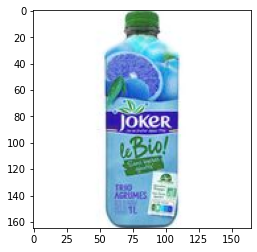

Category of Image: Mélanges de fruits 

Predicted Category: Mélanges de fruits


In [ ]:
print_prediction(10) # choose an index from the testing data [nomProduit_finaltest, other_finaltest,url_finaltest] to predict the category
#print_prediction(5)

In [ ]:
def sequence_to_sentences(sequence):
  tmp_l = [id_to_word[i] for i in sequence]
  setence = ''
  for i in tmp_l:
    if i != '<START>' and i != '<END>' and i != '<UKN>' and i != '<PAD>': 
      setence += i + ' '
  return setence

In [ ]:
len(pred)

10834

In [ ]:
suming = 0
for i in range(len(pred)):
  if np.argmax(pred[i]) != np.argmax(encoded_category_finaltest[i]):
    print(f'Product(without stopwords): {sequence_to_sentences(nomProduit_finaltest[i])} => Category: {id_to_category[np.argmax(encoded_category_finaltest[i])]} ===> Predicted Category: {id_to_category[np.argmax(pred[i])]}')
    suming += 1


Product(without stopwords): blonde12x33cl lmega marker fizz juicy superdefense phyto  => Category: Eau aromatisée gazeuse et gazéifiée ===> Predicted Category: Bières spéciales
Product(without stopwords): toute pitterson boualem maturation renaissance caraïbos vamp détoxifiante  => Category: Whisky ===> Predicted Category: Mélanges de fruits
Product(without stopwords): bien line briquettes wet  => Category: Visage ===> Predicted Category: Base de teint et Fixateurs
Product(without stopwords): ale oasismultifruits allongeant fizz "reflets alpes regard superdefense orientali  => Category: Bières spéciales ===> Predicted Category: Bières de spécialités
Product(without stopwords): kit  => Category: Eyeliner ===> Predicted Category: Eau de parfum
Product(without stopwords): puh balenciaga lmega guarana  => Category: Eau de toilette ===> Predicted Category: Mascara
Product(without stopwords): lighting peace juicy  => Category: Eau aromatisée gazeuse et gazéifiée ===> Predicted Category: Autr

In [ ]:
ratio = (nomProduit_finaltest.shape[0] - suming)/nomProduit_finaltest.shape[0]
print(f'Ratio of prediction = {ratio}')

Ratio of prediction = 0.9874469263429942


In [ ]:
# TESTING THE NEW SET
def Merging2Dataframe(df_1,df_2):
  
  df_1 = df_1[[c for c in df_1 if c not in ['category']] + ['category']]
  df_1 = df_1.fillna('SANS MARQUE')

  
  df_2.dropna(inplace=True)
  
  df_3 = df_2.merge(df_1,on="id", how = 'inner')
  return df_3

df_1 = pd.read_csv('/content/test_data_images.csv')
df_2 = pd.read_csv('/content/test_data_text.csv')
newdf_image_testing = Merging2Dataframe(df_2,df_1)
newdf_image_testing.head()

,id,url,nomProduit,marque,famille_drive,rayon_drive,category
0,166,https://media.auchan.fr/MEDIASTEP73419569_188x...,"Andros Jus de pommes 1,5L",ANDROS,Softs,C'est l'été,Jus de pomme
1,2810,https://media.auchan.fr/MEDIASTEP57433119_165x...,Auchan bio pur jus de fruits du verger brique 1l,AUCHAN,Multifruits,Boissons,Jus de pomme
2,3131,https://media.auchan.fr/MEDIASTEP61167474_460x...,Rik & Rok pur jus de pomme bio 4x20cl,RIK ET ROK,Monofruit,Boissons,Jus de pomme
3,3146,https://media.auchan.fr/MEDIASTEP57975980_188x...,Thomas le prince Pur jus de pomme poire bio bo...,THOMAS LE PRINCE,Bio et écolo,Bio et écolo,Jus de pomme
4,6395,/product-renderer/sav_20200710-01/images/pixel...,Auchan Pur jus de pomme trouble 1l,AUCHAN,"Jus de fruits, jus de légumes",Boissons,Jus de pomme


In [ ]:
#print(newdf_image.shape)
print(newdf_image_testing.shape)
newdf_image_testing.isnull().sum()

(94645, 7)


id               0
url              0
nomProduit       0
marque           0
famille_drive    0
rayon_drive      0
category         0
dtype: int64

In [ ]:
len(newdf_image_testing.category.unique())

45

In [ ]:
# Downloading Image Data Set
import requests
import shutil
if not os.path.isdir('/content/drive/My Drive/product_test'): 
  os.mkdir('/content/drive/My Drive/product_test') 
  
i = 81425
while i < newdf_image_testing['url'].values.size:
  ## Set up the image URL and filename
  tmp_image_url = newdf_image_testing['url'].values[i]
  if 'http' not in tmp_image_url:
    i += 1
    continue 
  tmp_image_url = tmp_image_url.encode('ascii', 'ignore').decode('ascii')
  tmp_filename = '/content/drive/My Drive/product_test/' + str(i) + '.jpg'
  # Open the url image, set stream to True, this will return the stream content.
  r = requests.get(tmp_image_url, stream = True)
   # Check if the image was retrieved successfully
  if r.status_code == 200:
        # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
      r.raw.decode_content = True
       
        # Open a local file with wb ( write binary ) permission.
      with open(tmp_filename,'wb') as f:
          shutil.copyfileobj(r.raw, f)
      if i % 10000 == 0:    
          print(f'Image {i} sucessfully Downloaded: ',tmp_filename)
  else:
    print('Image Couldn\'t be retreived')
  i += 1


In [ ]:
tmp_path = '/content/drive/My Drive/product_test'
len(os.listdir(tmp_path))

94570

In [ ]:
def processessing_new_testingdata(df):
  tmp_names = df.nomProduit.str.cat(sep=' ')
  nltk.download('punkt')
  tmp_tokens = word_tokenize(tmp_names)
  tmp_vocabulary = set(tmp_tokens)
  
  nltk.download('stopwords')
  tmp_stop_words = set(stopwords.words('french'))
  tmp_tokens = [w for w in tmp_tokens if (not w in tmp_stop_words)]
  tmp_vocabulary = set(tmp_tokens)
  
  tmp_result= []
  tmp_tokens = []
  for i,produit in enumerate(df.nomProduit.values):
    # tokenize the document
    tmp_words = text_to_word_sequence(produit,filters='!”$()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
    tmp_stop_words = set(stopwords.words('french'))
    tmp_words = [w for w in tmp_words if not w in tmp_stop_words]
    tmp_tokens += [w for w in tmp_words]
    tmp_result.append(tmp_words)
  print(tmp_result)
  df['nomProduit']=tmp_result
  df.head(5)
  
  le_marquet = [marque_to_id[c] for c in df.marque]
  df.marque = le_marquet

  le_familledrivet = [fd_to_id[c] for c in df.famille_drive]
  df.famille_drive = le_familledrivet

  le_rayondrivet = [rd_to_id[c] for c in df.rayon_drive]
  df.rayon_drive = le_rayondrivet

  df.head(5)
  tmp_sequence_of_id = []
  for sequence in df.nomProduit:
    tmp_sequence_of_id.append([1] + [word_to_id[w] if w in word_to_id else 2 for w in sequence ] )
  df.nomProduit = tmp_sequence_of_id
  df.head(5)

  tmp_category = [category_to_id[c] for c in df.category]
  df.category = tmp_category

  tmp_nomProduit_ = df.nomProduit.values
  tmp_nomProduit_ = np.array(tmp_nomProduit_,dtype=np.ndarray)
  tmp_maxLen = len(max(tmp_nomProduit_, key=len))


  tmp_nomProduit_ = df.nomProduit.values
  tmp_nomProduit_ = np.array(tmp_nomProduit_,dtype=np.ndarray)
  tmp_nomProduit_ = pad_sequences(tmp_nomProduit_, word_to_id, 20)

  tmp_other_ = df[['marque','famille_drive','rayon_drive']].values
  tmp_other_ = preprocessing.normalize(tmp_other_)

  tmp_category_ = df.category.values
  tmp_category_ = np.array(tmp_category_)
  tmp_encoded_category_ = to_categorical(tmp_category_)

  
  return tmp_nomProduit_,tmp_other_,tmp_encoded_category_

In [ ]:
newdf_image_testing.head()

,id,url,nomProduit,marque,famille_drive,rayon_drive,category
0,166,https://media.auchan.fr/MEDIASTEP73419569_188x...,"[1, 1367, 3160, 2791, 2837, 1014]",20,354,11,2
1,2810,https://media.auchan.fr/MEDIASTEP57433119_165x...,"[1, 2209, 162, 2351, 3160, 1889, 1252, 1011, 1...",27,272,7,2
2,3131,https://media.auchan.fr/MEDIASTEP61167474_460x...,"[1, 1266, 1084, 2187, 2351, 3160, 546, 162, 525]",567,269,7,2
3,3146,https://media.auchan.fr/MEDIASTEP57975980_188x...,"[1, 358, 3180, 2351, 3160, 546, 2694, 162, 246...",647,26,6,2
4,6395,/product-renderer/sav_20200710-01/images/pixel...,"[1, 2209, 2351, 3160, 546, 2086, 1780]",27,234,7,2


In [ ]:
tmp_nomProduit_,tmp_other_,tmp_encoded_category_ = processessing_new_testingdata(newdf_image_testing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tmp_data_sample = []
tmp_img_array_to_id = []

tmp_Image_size = 50
a = 0
tmp_path = '/content/drive/My Drive/product_test'
for img in os.listdir(tmp_path):
  try:
    tmp_index = int(img[:-4])
    tmp_img_array = cv2.imread(os.path.join(tmp_path,img) , cv2.IMREAD_GRAYSCALE)    
    tmp_new_array = cv2.resize(tmp_img_array,(tmp_Image_size,tmp_Image_size))
    tmp_img_array_to_id.append((tmp_new_array,tmp_index))
    tmp_data_sample.append([tmp_new_array,tmp_nomProduit_[tmp_index],tmp_other_[tmp_index],tmp_encoded_category_[tmp_index]])
    if a % 2000 == 0:
      print(f'Image {a} uploaded')
  except Exception as e:
    print(f'Error {a}')
  a += 1   

  

In [ ]:
len(tmp_data_sample)

94028

In [ ]:
import pickle
#pickle_out = open('/content/drive/My Drive/training_data_sample_.pickle','wb')
#pickle.dump(tmp_data_sample,pickle_out)
#pickle_out.close()

#pickle_out = open('/content/drive/My Drive/training_img_array_to_id.pickle','wb')
#pickle.dump(tmp_img_array_to_id,pickle_out)
#pickle_out.close()

In [ ]:
prickle_in = open('/content/drive/My Drive/training_data_sample_.pickle','rb')
tmp_data_sample = pickle.load(prickle_in)

prickle_in = open('/content/drive/My Drive/training_img_array_to_id.pickle','rb')
tmp_img_array_to_id = pickle.load(prickle_in)

In [ ]:
tested_tmp_data_sample = []
for i in tmp_data_sample:
  if i[3][44] != 1:
    tested_tmp_data_sample.append(i)
tested_tmp_data_sample[0:5]  

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([   1, 1367, 3160, 2791, 2837, 1014,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    3]),
  array([0.0563801 , 0.99792771, 0.03100905]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255,

In [ ]:
tmp_nomProduit_finaltest = []
tmp_other_finaltest = []
tmp_url_finaltest = []
tmp_encoded_category_finaltest = []

for url, nP, other, category in tested_tmp_data_sample[70000:]:
  tmp_url_finaltest.append(url)
  tmp_nomProduit_finaltest.append(nP)
  tmp_other_finaltest.append(other)
  tmp_encoded_category_finaltest.append(category)

tmp_url_finaltest = np.array(tmp_url_finaltest).reshape(-1 , tmp_Image_size , tmp_Image_size , 1 )
tmp_nomProduit_finaltest = np.array(tmp_nomProduit_finaltest)
tmp_other_finaltest = np.array(tmp_other_finaltest)
tmp_encoded_category_finaltest = np.array(tmp_encoded_category_finaltest)


In [ ]:
[id_to_word[i] for i in tmp_nomProduit_finaltest[0]]

['<START>',
 'andros',
 'jus',
 'pommes',
 '1',
 '5l',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<END>']

In [ ]:
loss, acc = model.evaluate([tmp_nomProduit_finaltest, tmp_other_finaltest,tmp_url_finaltest], tmp_encoded_category_finaltest)

715/715 [==============================] - 5s 7ms/step - loss: 0.8349 - accuracy: 0.8022


In [ ]:
nomProduit_finaltest, other_finaltest,url_finaltest

array([[   1, 3296, 1481,  618, 3198, 2049, 1408,  130,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    3],
       [   1, 2435,  406, 2853, 1648, 3051, 2435, 2452,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    3],
       [   1, 2435, 2008,  144, 1040, 3051, 2435, 2853,  743, 2615, 1590,
           0,    0,    0,    0,    0,    0,    0,    0,    3],
       [   1, 2099,  203,    6, 2592,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    3],
       [   1, 2435,  406, 2853, 1648, 3051, 2435, 2452,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    3]])

In [ ]:
encoded_category_finaltest[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 

In [ ]:
tmp_encoded_category_finaltest[0:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 